In [322]:


import pandas 
import numpy as np
from sklearn.metrics import   accuracy_score,  precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
import time






In [323]:
# load data
data = pandas.read_csv('weather_forecast_data.csv')
data


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,19.096119,71.651723,14.782324,48.699257,987.954760,no rain
1,27.112464,84.183705,13.289986,10.375646,1035.430870,no rain
2,20.433329,42.290424,7.216295,6.673307,1033.628086,no rain
3,19.576659,40.679280,4.568833,55.026758,1038.832300,no rain
4,19.828060,93.353211,0.104489,30.687566,1009.423717,no rain
...,...,...,...,...,...,...
2495,14.684023,82.054139,8.751728,58.939058,1003.418337,rain
2496,20.754521,92.099534,17.305508,70.889921,1049.801435,rain
2497,22.087516,71.530065,0.857918,84.162554,1039.664865,rain
2498,18.542453,97.451961,5.429309,54.643893,1014.769130,rain


In [324]:
# check for missing values
print("null values count for each feature")
print(data.isnull().sum())


print ("Before handling missing values")
data.info()


null values count for each feature
Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64
Before handling missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2475 non-null   float64
 1   Humidity     2460 non-null   float64
 2   Wind_Speed   2468 non-null   float64
 3   Cloud_Cover  2467 non-null   float64
 4   Pressure     2473 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [325]:
numeric_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'
       ]
target = 'Rain'
 
        ##  Task 1: Preprocessing
        
# 1.1: Handling missing values
def handel_missing_values_technique1(data):
    numeric_data = data[numeric_features]
    #  fill missing values with mean column values in the data frame
    data[numeric_features] = numeric_data.fillna(numeric_data.mean())
    return data

def handel_missing_values_technique2(data):
    data = data.dropna()
    return data


data = handel_missing_values_technique2(data)
print ("After handling missing values")
data.info()



After handling missing values
<class 'pandas.core.frame.DataFrame'>
Index: 2347 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2347 non-null   float64
 1   Humidity     2347 non-null   float64
 2   Wind_Speed   2347 non-null   float64
 3   Cloud_Cover  2347 non-null   float64
 4   Pressure     2347 non-null   float64
 5   Rain         2347 non-null   object 
dtypes: float64(5), object(1)
memory usage: 128.4+ KB


In [326]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,22.586674,64.313486,9.936976,49.826460,1014.362428
std,7.325814,19.969574,5.778717,29.163519,20.157864
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.423651,47.124078,4.786505,24.119752,997.010203
50%,22.533110,64.044753,9.999957,49.735062,1013.591009
75%,28.967040,81.607683,14.955263,75.496921,1031.683526
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [327]:
# 1.2 Scaling and Encoding
scaler = StandardScaler()
labelEncoder = LabelEncoder()

def scale_data(data, isTestData):    
    if not isTestData:
        data = scaler.fit_transform(data)
    else:
        data = scaler.transform(data)
    return pandas.DataFrame(data, columns=numeric_features)

def encode_target(data):
    data= labelEncoder.fit_transform(data[target])
    return pandas.DataFrame(data, columns=[target])

x = data[numeric_features]
y = encode_target(data)[target]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = scale_data(x_train, False)
x_test = scale_data(x_test, True)





In [328]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest_neighbors(self, crnt_X):
        distances = np.sqrt(((self.X - crnt_X) ** 2).sum(axis=1)) # Euclidean distance
        nearest_neighbors_indices = distances.argsort()[:self.k]
        return nearest_neighbors_indices
    
    def predict(self, X):
        predictions = []
        for crnt_X in X:
            nearest_neighbors_indices = self.get_nearest_neighbors(crnt_X)
            cnt = np.sum(self.y[nearest_neighbors_indices])
            if cnt > self.k/2:
                prediction = 1
            else:
                prediction = 0
            predictions.append(prediction)
        return predictions
        
        

In [329]:
class Metrics:
    def __init__(self, y_test, predictions, time =0 ):
        self.accuracy = accuracy_score(y_test, predictions)
        self.precision = precision_score(y_test, predictions)
        self.recall = recall_score(y_test, predictions)
        self.time = time
        
    def show(self, print_divider = True):
        if self.time != 0:
            print("time: ", self.time)
        print("Accuracy: ", self.accuracy)
        print("Precision: ", self.precision)
        print("Recall: ", self.recall)
        if print_divider:
            print("=====================================")

In [330]:
# Scratch KNN
k_values = [1, 3, 5, 9, 100]

for k in k_values:
    knn = KNN(k)
    start_time = time.time()
    knn.fit(x_train.values, y_train.values)
    predictions = knn.predict(x_test.values)
    end_time = time.time()
    print("K = ", k)
    Metrics(y_test, predictions, end_time - start_time).show(False)
 
    

K =  1
time:  0.033559560775756836
Accuracy:  0.9574468085106383
Precision:  0.8235294117647058
Recall:  0.7924528301886793
K =  3
time:  0.028516530990600586
Accuracy:  0.9702127659574468
Precision:  0.9148936170212766
Recall:  0.8113207547169812
K =  5
time:  0.027757883071899414
Accuracy:  0.9744680851063829
Precision:  0.9555555555555556
Recall:  0.8113207547169812
K =  9
time:  0.027549266815185547
Accuracy:  0.9744680851063829
Precision:  0.9361702127659575
Recall:  0.8301886792452831
K =  100
time:  0.03804135322570801
Accuracy:  0.9531914893617022
Precision:  1.0
Recall:  0.5849056603773585


In [335]:
from sklearn.neighbors import KNeighborsClassifier

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    end_time = time.time()
    print("K = ", k)
    Metrics(y_test, predictions, end_time - start_time).show(False)


K =  1
time:  0.027015209197998047
Accuracy:  0.9574468085106383
Precision:  0.8235294117647058
Recall:  0.7924528301886793
K =  3
time:  0.019622087478637695
Accuracy:  0.9702127659574468
Precision:  0.9148936170212766
Recall:  0.8113207547169812
K =  5
time:  0.018055200576782227
Accuracy:  0.9744680851063829
Precision:  0.9555555555555556
Recall:  0.8113207547169812
K =  9
time:  0.018344402313232422
Accuracy:  0.9744680851063829
Precision:  0.9361702127659575
Recall:  0.8301886792452831
K =  100
time:  0.03110361099243164
Accuracy:  0.9531914893617022
Precision:  1.0
Recall:  0.5849056603773585


In [332]:
from sklearn.naive_bayes import GaussianNB

naive_bayes =  GaussianNB()
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)

Metrics(y_test, predictions).show()

Accuracy:  0.9702127659574468
Precision:  1.0
Recall:  0.7358490566037735


In [333]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
predictions = decision_tree.predict(x_test)

Metrics(y_test, predictions).show()


Accuracy:  0.9936170212765958
Precision:  1.0
Recall:  0.9433962264150944


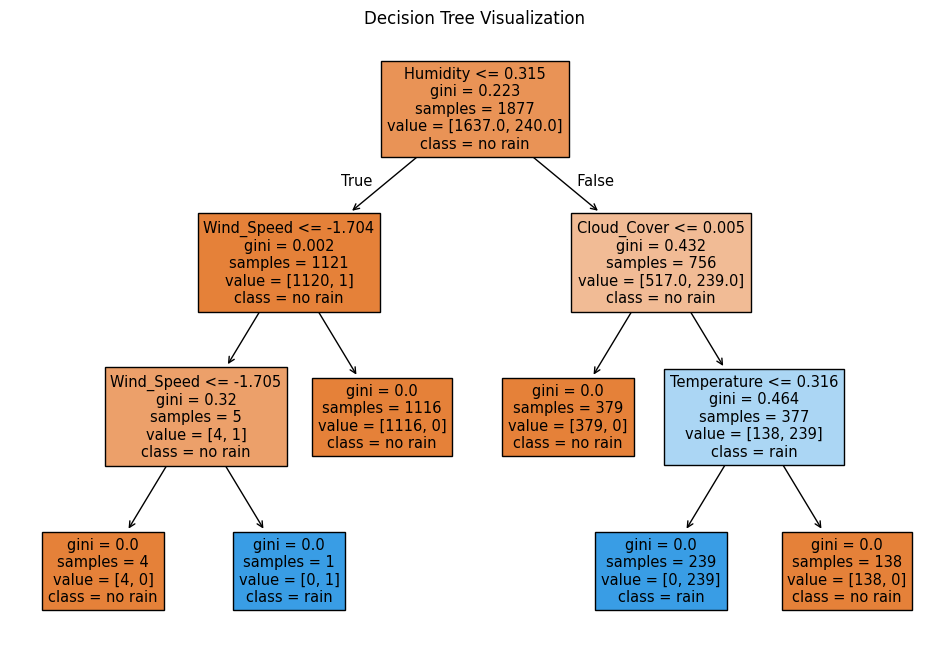

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8)) 
plot_tree(decision_tree, feature_names=numeric_features, class_names=["no rain", "rain"], filled=True) 
plt.title("Decision Tree Visualization") 
plt.show()